# CLASSIFICAÇÃO ML

### IMPORTAÇÕES DE BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

### IMPORTAÇÃO DO DATASET

In [2]:
dados = pd.read_csv(
    'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'
)
dados.sample(5)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
4497,1,Sim,Nao,60,Sim,Nao,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,Sim,ChequeDigital,97.95,Nao
440,0,Sim,Sim,16,Sim,Sim,FibraOptica,Sim,Nao,Sim,Sim,Sim,Sim,Mensalmente,Sim,ChequeDigital,112.95,Nao
6128,0,Sim,Nao,14,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Sim,Mensalmente,Sim,ChequeDigital,78.10,Nao
198,0,Sim,Sim,72,Sim,Sim,FibraOptica,Nao,Sim,Sim,Sim,Sim,Sim,DoisAnos,Sim,DebitoEmConta,112.25,Nao
1817,1,Sim,Nao,72,Sim,Sim,FibraOptica,Nao,Sim,Nao,Nao,Sim,Sim,DoisAnos,Nao,DebitoEmConta,98.35,Nao


obs: Objetivo é identificar o Churn, se o cliente tem ou não chances de encerrar o plano da empresa 'AluraVoz'

In [3]:
print(f'No dataset temos {dados.shape[0]} Linhas e {dados.shape[1]} Colunas')

No dataset temos 7043 Linhas e 18 Colunas


In [4]:
#Verificando os tipos de dados do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [5]:
#Verificando se há dados nulos
dados.isna().sum()

Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

### TRANSFORMAÇÃO DE DADOS

In [6]:
dados.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

In [7]:
traducao_dic = {'Sim' : 1,
                'Nao' : 0}
dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn']]\
                    .replace(traducao_dic) #Transformando as variáveis categoricas
dados_modificados.sample(5)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
1701,1,1,1,1,1
6782,0,0,1,0,0
3011,1,1,1,0,0
1179,1,0,1,1,0
4643,0,0,1,1,0


In [8]:
#Utilizando o getdummies para o restante das variáveis categóricas
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline','Churn'], axis=1))
dummie_dados.sample(5)

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
3368,0,46,94.15,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1378,0,58,66.80,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
754,0,2,90.35,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1299,0,11,44.05,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2694,0,8,19.65,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [9]:
#Concatenando os dados
dados_final = pd.concat([dados_modificados, dummie_dados], axis=1)
dados_final.sample(5)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
5575,1,1,1,0,0,0,70,78.35,0,0,...,0,0,1,0,0,1,0,0,0,1
3559,0,0,1,0,0,0,27,19.85,1,0,...,0,1,0,1,0,0,1,0,0,0
1010,0,0,1,1,0,0,3,50.15,1,0,...,1,0,0,0,1,0,0,0,1,0
5940,1,1,1,1,0,0,56,85.85,1,0,...,1,0,0,0,0,1,0,0,1,0
5383,0,0,1,1,1,0,36,84.75,0,0,...,0,0,1,0,1,0,0,1,0,0


In [10]:
list(dados_final.columns)

['Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'PagamentoOnline',
 'Churn',
 'Maior65Anos',
 'MesesDeContrato',
 'ContaMensal',
 'VariasLinhasTelefonicas_Nao',
 'VariasLinhasTelefonicas_SemServicoTelefonico',
 'VariasLinhasTelefonicas_Sim',
 'ServicoDeInternet_DSL',
 'ServicoDeInternet_FibraOptica',
 'ServicoDeInternet_Nao',
 'SegurancaOnline_Nao',
 'SegurancaOnline_SemServicoDeInternet',
 'SegurancaOnline_Sim',
 'BackupOnline_Nao',
 'BackupOnline_SemServicoDeInternet',
 'BackupOnline_Sim',
 'SeguroNoDispositivo_Nao',
 'SeguroNoDispositivo_SemServicoDeInternet',
 'SeguroNoDispositivo_Sim',
 'SuporteTecnico_Nao',
 'SuporteTecnico_SemServicoDeInternet',
 'SuporteTecnico_Sim',
 'TVaCabo_Nao',
 'TVaCabo_SemServicoDeInternet',
 'TVaCabo_Sim',
 'StreamingDeFilmes_Nao',
 'StreamingDeFilmes_SemServicoDeInternet',
 'StreamingDeFilmes_Sim',
 'TipoDeContrato_DoisAnos',
 'TipoDeContrato_Mensalmente',
 'TipoDeContrato_UmAno',
 'FormaDePagamento_CartaoDeCredito',
 'FormaDePagamento_ChequeDigital',
 '

In [11]:
#Removendo algumas colunas
dados_final.drop(['StreamingDeFilmes_Nao','TVaCabo_Nao', 'SuporteTecnico_Nao','SeguroNoDispositivo_Nao','BackupOnline_Nao' ,
                 'SegurancaOnline_Nao', 'VariasLinhasTelefonicas_Nao'], axis=1, inplace=True)


In [12]:
dados_final.sample(5)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,TVaCabo_Sim,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
2250,0,0,1,0,0,0,15,20.10,0,0,...,0,1,0,0,0,1,1,0,0,0
2774,0,0,1,0,0,0,6,50.05,0,0,...,0,0,0,0,1,0,0,0,1,0
3698,0,0,1,1,0,0,59,83.25,0,1,...,0,0,0,0,1,0,0,1,0,0
4759,0,0,1,1,1,0,1,78.95,0,0,...,1,0,0,0,1,0,0,1,0,0
2274,1,1,1,1,1,0,23,99.85,0,0,...,1,0,1,0,1,0,0,1,0,0


#### Dados desbalanceadosm

Dados desbalanceados são aqueles que possuem muitos registros 
para uma categoria e poucos para outra. Se não balanceamos 
esses dados de alguma forma, eles podem acarretar em problemas
na construção de modelos e na geração de previsões.

In [13]:
sns.set_palette('dark')
sns.set_style('whitegrid')

Text(0, 0.5, 'Quantidade')

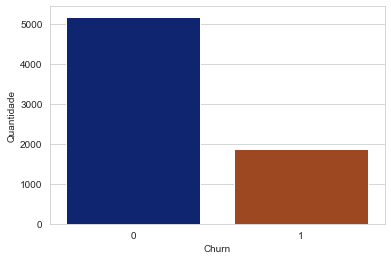

In [14]:
ax = sns.countplot(x='Churn', data=dados_final)
ax.set_ylabel('Quantidade')

In [15]:
dados_final.Churn.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

Analisando, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso.

Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, SMOTE

In [16]:
#!pip install -U imbalanced-learn #Instalação da biblioteca

In [17]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

A = dados_final.drop('Churn', axis = 1)
b = dados_final['Churn']

In [18]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
A, b = smt.fit_resample(A, b)  # Realiza a reamostragem do conjunto de dados

In [19]:
dados_final = pd.concat([A, b], axis=1)  # Concatena a variável target (b) com as features (A)
dados_final.sample(5)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
6496,1,0,1,0,1,40,101.850000,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1926,1,1,1,1,0,49,99.800000,0,1,0,...,0,1,0,1,0,0,1,0,0,1
3176,1,0,1,0,0,51,25.500000,0,1,0,...,1,0,1,0,0,0,0,1,0,0
9216,0,0,1,1,0,7,79.935633,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4899,0,1,1,0,0,4,84.050000,0,1,0,...,0,0,0,1,0,0,0,0,1,1


Text(0, 0.5, 'Quantidade')

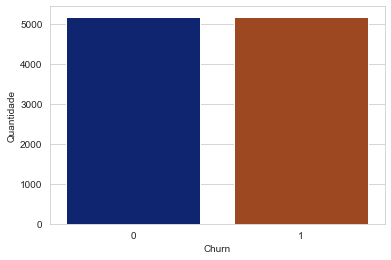

In [20]:
ax = sns.countplot(x='Churn', data=dados_final)
ax.set_ylabel('Quantidade')

# NORMALIZAÇÃO DOS DADOS

In [21]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [22]:
#Import da biblioteca para normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) #Normalizando os dados
X

array([[ 1.26568609, -0.53010391, -3.0591434 , ...,  1.29486231,
        -0.48369553, -0.43742701],
       [-0.79008532, -0.53010391,  0.32688889, ..., -0.77228289,
         2.06741626, -0.43742701],
       [-0.79008532, -0.53010391,  0.32688889, ..., -0.77228289,
         2.06741626, -0.43742701],
       ...,
       [ 1.26568609,  1.88642262,  0.32688889, ...,  1.29486231,
        -0.48369553, -0.43742701],
       [-0.79008532, -0.53010391,  0.32688889, ..., -0.77228289,
        -0.48369553, -0.43742701],
       [-0.79008532, -0.53010391,  0.32688889, ..., -0.77228289,
        -0.48369553, -0.43742701]])

## TREINO E TESTE

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

# Modelo knn

In [25]:
#Importação do modelo KNN
from sklearn.neighbors import KNeighborsClassifier

### Vamos utilizar o método conhecido como método cotovelo para saber a quantidade ideal de clusters                 ( K vizinhos).

In [26]:
error_rate = []

for i in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)
    error_rate.append(np.mean(knn_y_pred != y_test))

Text(0, 0.5, 'Taxa de error')

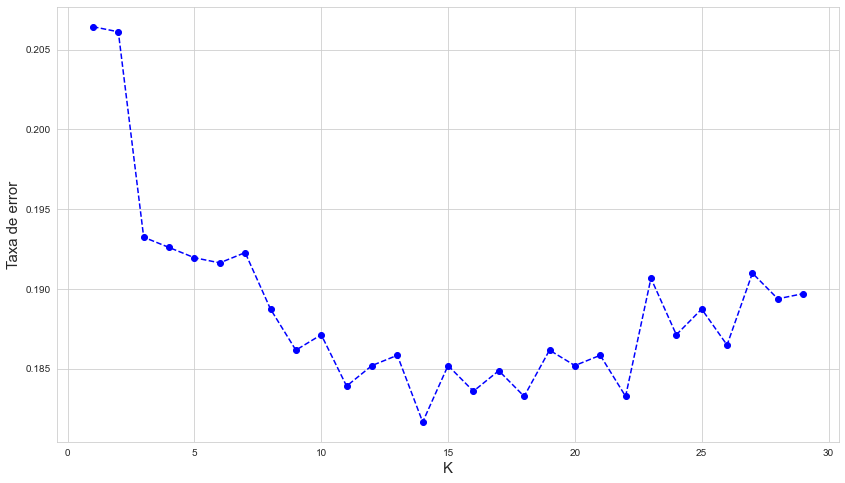

In [27]:
#Visualização da variação dos clusters
plt.figure(figsize=(14,8))
plt.plot(range(1,30), error_rate, color='blue', ls='--', marker='o')
plt.xlabel('K',  fontsize=15)
plt.ylabel('Taxa de error', fontsize=15)

K = 14 parece ser um bom valo para usar no modelo

In [28]:
#Modelo
knn_modelo = KNeighborsClassifier(n_neighbors = 14) #Estanciando o modelo, n_neighbors é o número de clusters
knn_modelo.fit(X_train, y_train) #Treinando o modelo 
knn_pred = knn_modelo.predict(X_test) #Prevendo dados

In [29]:
#Matriz de confusão
print(confusion_matrix(y_test, knn_pred))

[[1232  337]
 [ 227 1309]]


In [30]:
#Acurácia
print(accuracy_score(y_test, knn_pred))

0.8183574879227054


In [31]:
#precisão
print(precision_score(y_test, knn_pred))

0.7952612393681653


# MODELO Bernoulli Naïve Bayes

classificador probabilístico baseado no Teorema de Bayes, o qual foi criado por Thomas Bayes (1701 - 1761)".Trata-se de um Algorítimo Supervisionado destinado a probabilidades

In [32]:
from sklearn.naive_bayes import BernoulliNB #Import da biblioteca

In [33]:
BernNB = BernoulliNB(binarize = 0.3)
BernNB.fit(X_train, y_train)
bnb_pred = BernNB.predict(X_test)

In [34]:
#Matriz de confusão
print(confusion_matrix(y_test, bnb_pred))

[[1127  442]
 [ 224 1312]]


In [35]:
#Acurácia
print(accuracy_score(y_test, bnb_pred))

0.7855072463768116


In [36]:
#precisão
print(precision_score(y_test, bnb_pred))

0.7480045610034207


# MODELO Árvore de decisão

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
arvore = DecisionTreeClassifier(random_state=30)
arvore.fit(X_train, y_train)
arvore_pred = arvore.predict(X_test)

In [39]:
#Matriz de confusão
print(confusion_matrix(y_test, arvore_pred))

[[1248  321]
 [ 292 1244]]


In [40]:
#Acurácia
print(accuracy_score(y_test, arvore_pred))

0.8025764895330113


In [41]:
#precisão
print(precision_score(y_test, arvore_pred))

0.794888178913738


## MODELO ESCOLHIDO

Baseado na acurácia e precisão o modelo **KNN** foi o que teve a melhor perfomece com **81,8%** de Acurácia e **79,5%** de Precisão!